In [1]:
import tensorflow as tf
from tensorflow import keras

In [2]:
!python -V

Python 3.8.8


In [3]:
tf.__version__

'2.3.0'

In [4]:
model = keras.models.load_model('dogs_cats_10_0.687.h5') 

In [5]:
from tensorflow.keras.preprocessing.image import load_img

In [6]:
img = load_img('dog.9959.jpg',target_size=(150,150))

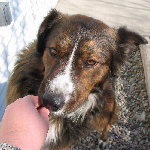

In [7]:
img

In [8]:
wynik ={'cats': 0, 'dogs': 1}

In [9]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [10]:
data_gen = ImageDataGenerator(rescale=1./255)

In [11]:
import numpy as np

In [12]:
x = np.array(img)

In [13]:
x.shape

(150, 150, 3)

In [14]:
x = x/255
x = np.float32(x)

In [15]:
X = np.array([x])

In [16]:
X

array([[[[0.98039216, 0.9882353 , 0.9764706 ],
         [0.9843137 , 0.99215686, 0.98039216],
         [0.99607843, 1.        , 0.99215686],
         ...,
         [0.8352941 , 0.81960785, 0.7764706 ],
         [0.8235294 , 0.80784315, 0.7647059 ],
         [0.8509804 , 0.8352941 , 0.8       ]],

        [[0.9764706 , 0.9843137 , 0.98039216],
         [0.98039216, 0.9882353 , 0.9843137 ],
         [0.9764706 , 0.9843137 , 0.98039216],
         ...,
         [0.76862746, 0.7411765 , 0.7019608 ],
         [0.76862746, 0.7411765 , 0.7019608 ],
         [0.7921569 , 0.7764706 , 0.7411765 ]],

        [[0.6745098 , 0.69411767, 0.70980394],
         [0.6862745 , 0.7058824 , 0.72156864],
         [0.7176471 , 0.7372549 , 0.7529412 ],
         ...,
         [0.8666667 , 0.83137256, 0.79607844],
         [0.8235294 , 0.7882353 , 0.7529412 ],
         [0.7921569 , 0.7764706 , 0.7411765 ]],

        ...,

        [[0.6666667 , 0.6784314 , 0.7058824 ],
         [0.7372549 , 0.7294118 , 0.73333335]

In [17]:
model.predict(X)

array([[0.545839]], dtype=float32)

In [18]:
converter = tf.lite.TFLiteConverter.from_keras_model(model)
tflite_model = converter.convert()

with open('dogs_cats_10_0.687.tflite', 'wb') as f_out:
    f_out.write(tflite_model)

Instructions for updating:
This property should not be used in TensorFlow 2.0, as updates are applied automatically.
Instructions for updating:
This property should not be used in TensorFlow 2.0, as updates are applied automatically.
INFO:tensorflow:Assets written to: C:\Users\mikeo\AppData\Local\Temp\tmpkdd7vgag\assets


In [19]:
!ls -lh

'ls' is not recognized as an internal or external command,
operable program or batch file.


In [20]:
import tensorflow.lite as tflite

In [21]:
interpreter = tflite.Interpreter(model_path='dogs_cats_10_0.687.tflite')
interpreter.allocate_tensors()

input_index = interpreter.get_input_details()[0]['index']
output_index = interpreter.get_output_details()[0]['index']

In [22]:
output_index

13

In [23]:
interpreter.set_tensor(input_index,X)
interpreter.invoke()

preds = interpreter.get_tensor(output_index)

In [24]:
from PIL import Image

In [25]:
with Image.open('dog.9959.jpg') as img:
    img = img.resize((150,150),Image.NEAREST)

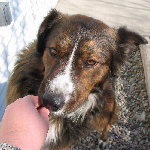

In [26]:
img

In [27]:
url = 'https://upload.wikimedia.org/wikipedia/commons/9/9a/Pug_600.jpg'

In [28]:
from io import BytesIO
from urllib import request

from PIL import Image

def download_image(url):
    with request.urlopen(url) as resp:
        buffer = resp.read()
    stream = BytesIO(buffer)
    img = Image.open(stream)
    return img


def prepare_image(img, target_size):
    if img.mode != 'RGB':
        img = img.convert('RGB')
    img = img.resize(target_size, Image.NEAREST)
    return img

In [29]:
img = download_image(url)

In [30]:
img = prepare_image(img,(150,150))

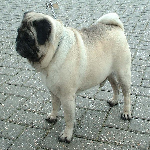

In [31]:
img

In [32]:
x = np.array(img)

In [33]:
x.shape

(150, 150, 3)

In [34]:
x = np.float32(x/255)

In [35]:
x

array([[[0.7058824 , 0.77254903, 0.7490196 ],
        [0.69411767, 0.7607843 , 0.7294118 ],
        [0.6313726 , 0.69803923, 0.6666667 ],
        ...,
        [0.7647059 , 0.8509804 , 0.8392157 ],
        [0.68235296, 0.74509805, 0.74509805],
        [0.6745098 , 0.76862746, 0.7764706 ]],

       [[0.5254902 , 0.5921569 , 0.5686275 ],
        [0.7372549 , 0.8039216 , 0.78039217],
        [0.60784316, 0.6745098 , 0.6431373 ],
        ...,
        [0.7921569 , 0.8666667 , 0.85882354],
        [0.6313726 , 0.7019608 , 0.6392157 ],
        [0.7882353 , 0.8784314 , 0.85490197]],

       [[0.6862745 , 0.7490196 , 0.7372549 ],
        [0.61960787, 0.6862745 , 0.6627451 ],
        [0.64705884, 0.7137255 , 0.68235296],
        ...,
        [0.6       , 0.65882355, 0.64705884],
        [0.627451  , 0.69411767, 0.654902  ],
        [0.7058824 , 0.79607844, 0.77254903]],

       ...,

       [[0.5803922 , 0.61960787, 0.58431375],
        [0.49019608, 0.5254902 , 0.5058824 ],
        [0.5686275 , 0

In [36]:
x[0][0][0]

0.7058824

In [37]:
X = np.array([x])

In [38]:
X.shape

(1, 150, 150, 3)

In [39]:
interpreter.set_tensor(input_index,X)
interpreter.invoke()

preds = interpreter.get_tensor(output_index)

In [40]:
preds[0][0]

0.7704913

In [41]:
url = 'https://upload.wikimedia.org/wikipedia/commons/9/9a/Pug_600.jpg'

def predict(url):
    import numpy as np
    import tflite_runtime.interpreter as tflite
    from io import BytesIO
    from urllib import request
    from PIL import Image
    def download_image(url):
        with request.urlopen(url) as resp:
            buffer = resp.read()
        stream = BytesIO(buffer)
        img = Image.open(stream)
        return img

    def prepare_image(img, target_size):
        import numpy as np
        if img.mode != 'RGB':
            img = img.convert('RGB')
        img = img.resize(target_size, Image.NEAREST)
        return img
    
    img = download_image(url)
    img = prepare_image(img,(150,150))
    x = np.array(img)
    x = np.float32(x/255)
    X = np.array([x])

    interpreter = tflite.Interpreter(model_path='dogs_cats_10_0.687.tflite')
    interpreter.allocate_tensors()

    input_index = interpreter.get_input_details()[0]['index']
    output_index = interpreter.get_output_details()[0]['index']

    interpreter.set_tensor(input_index,X)
    interpreter.invoke()

    preds = interpreter.get_tensor(output_index)
    print(preds)
    return preds

predict(url)


[[0.7704913]]


array([[0.7704913]], dtype=float32)

In [ ]:
url = 'https://upload.wikimedia.org/wikipedia/commons/9/9a/Pug_600.jpg'

def predict(url):
    import numpy as np
    import tflite_runtime.interpreter as tflite
    from io import BytesIO
    from urllib import request
    from PIL import Image
    def download_image(url):
        with request.urlopen(url) as resp:
            buffer = resp.read()
        stream = BytesIO(buffer)
        img = Image.open(stream)
        return img

    def prepare_image(img, target_size):
        if img.mode != 'RGB':
            img = img.convert('RGB')
        img = img.resize(target_size, Image.NEAREST)
        return img
    
    img = download_image(url)
    img = prepare_image(img,(150,150))
    x = np.array(img)
    x = np.float32(x/255)
    X = np.array([x])

    interpreter = tflite.Interpreter(model_path='dogs_cats_10_0.687.tflite')
    interpreter.allocate_tensors()

    input_index = interpreter.get_input_details()[0]['index']
    output_index = interpreter.get_output_details()[0]['index']

    interpreter.set_tensor(input_index,X)
    interpreter.invoke()

    preds = interpreter.get_tensor(output_index)
    print(preds)
    return preds

predict(url)


In [ ]:
url = 'https://upload.wikimedia.org/wikipedia/commons/9/9a/Pug_600.jpg'

In [ ]:

def download_image(url):
    with request.urlopen(url) as resp:
        buffer = resp.read()
    stream = BytesIO(buffer)
    img = Image.open(stream)
    return img

def prepare_image(img, target_size):
    if img.mode != 'RGB':
        img = img.convert('RGB')
    img = img.resize(target_size, Image.NEAREST)
    return img
    
img = download_image(url)
img = prepare_image(img,(150,150))
x = np.array(img)
x = np.float32(x/255)
X = np.array([x])

interpreter = tflite.Interpreter(model_path='dogs_cats_10_0.687.tflite')
interpreter.allocate_tensors()

input_index = interpreter.get_input_details()[0]['index']
output_index = interpreter.get_output_details()[0]['index']

interpreter.set_tensor(input_index,X)
interpreter.set_tensor(input_index,X)

preds = interpreter.get_tensor(output_index)
print(preds)
 

